# Import Software Libraries

In [1]:
import datetime as dt  # Work with datetime types.
import os  # Interact with the operating system.
import sys  # Read system parameters.
import warnings  # Ignore warnings
from io import StringIO  # Read and write strings as files
from urllib.parse import urlparse  # Parse url and extract path component

import matplotlib
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data frames.
import requests  # Send HTTP requests
import sklearn  # Perform feature engineering and machine learning.
import statsmodels  # Perform statistical modeling.

# Summarize software libraries used.
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- statsmodels {}".format(statsmodels.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- requests {}".format(requests.__version__))
print("- statsmodels {}".format(statsmodels.__version__))
print("- Python {}\n".format(sys.version))

Libraries used in this project:
- NumPy 1.24.3
- pandas 2.0.3
- scikit-learn 1.3.2
- statsmodels 0.14.1
- Matplotlib 3.7.2
- requests 2.32.3
- statsmodels 0.14.1
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]



# Load Dataset

In [2]:
# Capture URL
url = "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/economics_data.csv"
request = requests.get(url).text

# Save as dataframe and copy
original = pd.read_csv(StringIO(request))
df = original.copy()

# Parse URL
parsed_url = urlparse(url)
path = parsed_url.path
filename = os.path.basename(path)


print(f"Loaded {len(df)} records from {filename}.")

Loaded 123 records from economics_data.csv.


# Get Acquainted with the Dataset

**Display Dataframe Summary**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    123 non-null    object 
 1   rgnp    123 non-null    float64
 2   pgnp    123 non-null    float64
 3   ulc     123 non-null    float64
 4   gdfco   123 non-null    float64
 5   gdf     123 non-null    float64
 6   gdfim   123 non-null    float64
 7   gdfcf   123 non-null    float64
 8   gdfce   123 non-null    float64
dtypes: float64(8), object(1)
memory usage: 8.8+ KB
None


**Spotlights** 

This dataset consists of 123 rows and 9 columns. All columns, with the exception of the date column, contain float values, and there seems to be no missing data present.

**Columns** 

- **date**, which records each observation every 3 months. In other words, these are quarterly
observations for each year.
- **rgnp**, the real gross national product (GNP), the value of all products and services produced by
a country's residents. In recent times, GNP has largely been replaced by the gross national
income (GNI), which determines the same thing but using a different calculation.
- **pgnp**, the potential GNP. Potential GNP uses a constant rate of inflation, whereas real GNP
uses a variable rate of inflation. Potential GNP is therefore an estimate, and is often used to
measure the GNP of the following fiscal quarter.
- **ulc**, the unit labor cost (ULC). ULC measures labor productivity by calculating the average cost
of labor per unit of output.
- **gdfco**, the fixed weight deflator for personal consumption expenditure (excluding food and
energy). In GNP/GDI, a deflator is a measure of both price inflation and deflation.
- **gdf**, the fixed weight deflator for the GNP. This deflator covers the entire GNP, rather than just
one aspect.
- **gdfim**, the fixed weight deflator for imports.
- **gdfcf**, the fixed weight deflator for food in personal consumption expenditures.
- **gdfce**, the fixed weight deflator for energy in personal consumption expenditures.

**Display First 10 Records**

In [4]:
print(df.head(10))

         date    rgnp    pgnp   ulc  gdfco   gdf  gdfim  gdfcf  gdfce
0  1959-01-01  1606.4  1608.3  47.5   36.9  37.4   26.9   32.3   23.1
1  1959-04-01  1637.0  1622.2  47.5   37.4  37.5   27.0   32.2   23.4
2  1959-07-01  1629.5  1636.2  48.7   37.6  37.6   27.1   32.4   23.4
3  1959-10-01  1643.4  1650.3  48.8   37.7  37.8   27.1   32.5   23.8
4  1960-01-01  1671.6  1664.6  49.1   37.8  37.8   27.2   32.4   23.8
5  1960-04-01  1666.8  1679.0  49.6   38.0  38.0   27.4   32.8   23.9
6  1960-07-01  1668.4  1693.5  50.0   38.1  38.1   27.4   32.9   24.1
7  1960-10-01  1654.1  1708.2  50.2   38.2  38.2   27.2   33.2   24.2
8  1961-01-01  1671.3  1722.9  50.1   38.2  38.2   27.2   33.2   24.2
9  1961-04-01  1692.1  1737.8  49.8   38.3  38.2   27.2   33.2   24.2


The article from which this dataset is derived aims to analyze the causal relationship between wages and prices. In this machine learning project, the focus is on predicting these variables for multiple quarters following the last recorded observation. Before proceeding, it is essential to prepare the time series data.

# Transform the 'Date' column into a datetime index.

The next steps are to properly format the **date** column and convert it into the index of the dataframe. 

In [5]:
df.index = pd.to_datetime(df["date"])
df.index = df.index.to_period("M")
df.drop(["date"], axis=1, inplace=True)
df

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


- The **date** column has been transformed.
- The first recorded observation dates back to January 1959, while the most recent observation occurred in July 1989.

# Graph All Features

- The code from lines 12 to 36 is responsible for verifying the presence of prediction data within the function call. In the event that such data is included, lines 11 to 26 will generate plots for both the historical data and the predicted data. Conversely, if no prediction data is found, lines 28 and 29 will solely produce a plot of the historical data.

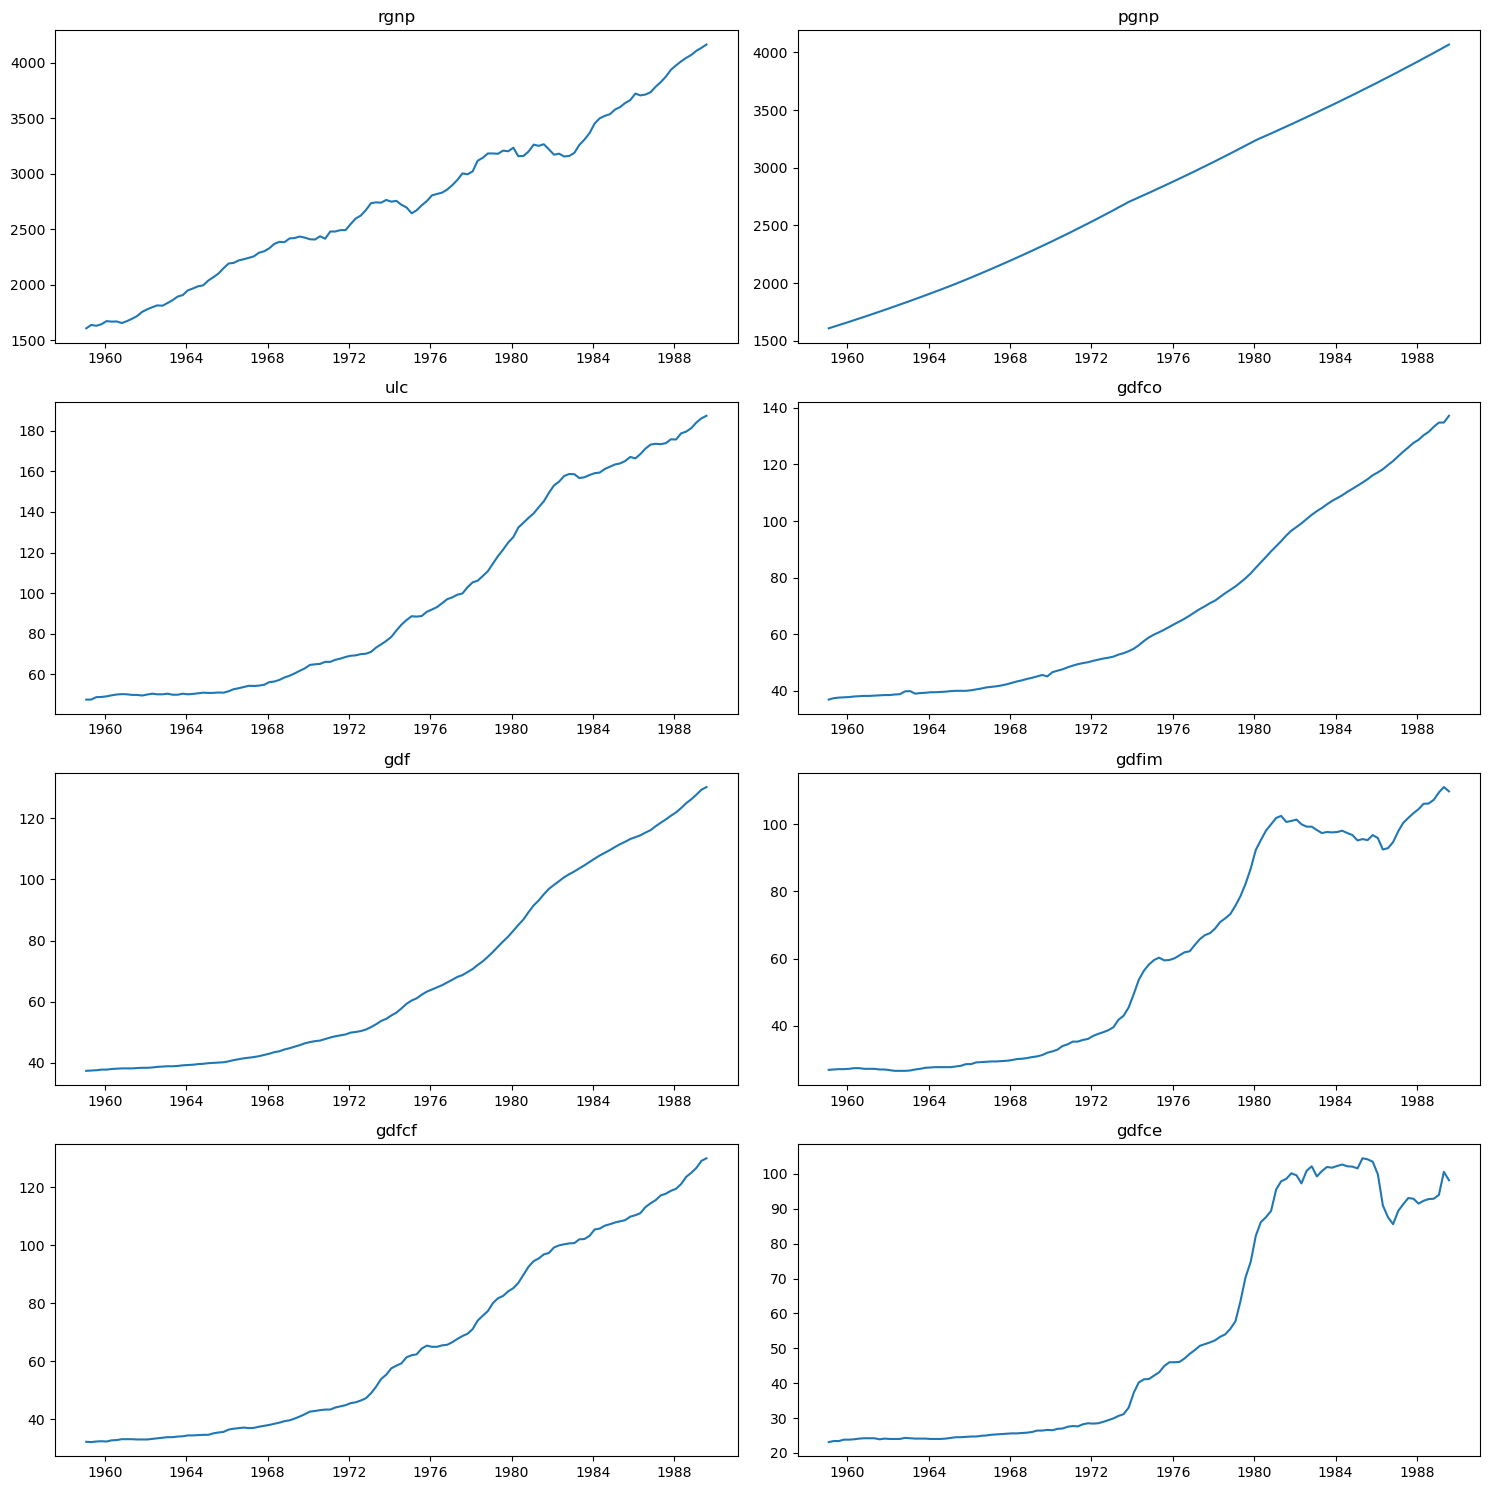

In [6]:
def plot_all_features(df_actual, df_predictions=None, has_predictions=False):
    """The visualization displays each time feature as a line graph, allowing for the inclusion of optional forecasts."""

    number_of_features = len(df_actual.columns)

    # Create the figure subplots for each feature.
    fig, ax = plt.subplots(number_of_features // 2, 2, figsize=(15, 15))
    ax = ax.ravel()

    """Systematically traverse through every individual column to incorporate each column or feature into a subplot."""
    for column, i in zip(df.columns, range(number_of_features)):
        if has_predictions:
            # Plot forecasted values a a line
            ax[i].plot_date(
                df_predictions.index,
                df_predictions[column],
                fmt="-",
                color="#74C365",
                label="Forecasted",
            )

            # Plot historical values a line
            ax[i].plot_date(
                df_actual.index,
                df_actual[column],
                fmt="-",
                color="black",
                label="Historical",
            )

            ax[i].set_title(column)

            ax[i].legend(loc="lower left", frameon=True, borderaxespad=1.5)
        else:
            ax[i].plot_date(df_actual.index, df_actual[column], fmt="-")
            ax[i].set_title(column)

    fig.tight_layout()


plot_all_features(df)

**Spotlights** 

- Overall, the majority of features are showing an upward trend.
- There are sporadic declines in rgnp, ulc, gdfim, gdfcf, and gdfce, with the most significant drops observed in gdfim and gdfce during the mid-1980s.
- pgnp, gdfco, and gdf demonstrate a steady increase, especially notable in pgnp.

# Split the Datatset

A unified set of training and testing data will be developed to predict outcomes without a singular label. Similar to ARIMA and other time series models, it is essential that the data split for a VAR model remains non-randomized, which is why the parameter shuffle is set to False. In this scenario, 115 observations will be designated for the training set, while the remaining observations will comprise the test set. For larger datasets, a more proportional division may prove advantageous; however, in this instance, a smaller test set is deemed preferable.

In [7]:
from sklearn.model_selection import train_test_split

# All variables will be included in the forecast, so only one set of train/test split is needed

# Split most recent data fro testing

In [8]:
X_train, X_test = train_test_split(
    df,
    train_size=115,
    shuffle=False,
)

# Compare number of rows and columns in original data to training and testing sets
print(f"Original set:      {df.shape}")
print("------------------------------")
print(f"Training Features:  {X_train.shape}")
print(f"Training Features:  {X_test.shape}")

Original set:      (123, 8)
------------------------------
Training Features:  (115, 8)
Training Features:  (8, 8)


# Test Time Series for Stationarity

In [9]:
from statsmodels.tools.sm_exceptions import InterpolationWarning
from statsmodels.tsa.stattools import adfuller, kpss

# The warning regarding KPSS interpolation is disregarded.
warnings.simplefilter("ignore", InterpolationWarning)


def analyze_stationarity(dataset):
    """The ADF and KPSS tests are utilized to assess the stationarity of the data."""
    adf_pvalue, kpss_pvalue = [], []

    for column in dataset.columns:
        adf_test = adfuller(dataset[column], autolag="AIC")
        adf_pvalue.append(adf_test[1])  # Index has pvalue

        kpss_test = kpss(dataset[column], nlags="auto")
        kpss_pvalue.append(kpss_test[1])  # Index has pvalue

    stationarity = pd.DataFrame(
        index=df.columns, data={"ADF pvlaue": adf_pvalue, "KPSS pvalue": kpss_pvalue}
    )

    return stationarity


analyze_stationarity(X_train)

,ADF pvlaue,KPSS pvalue
rgnp,0.976808,0.01
pgnp,0.994343,0.01
ulc,0.994495,0.01
gdfco,0.997674,0.01
gdf,0.997371,0.01
gdfim,0.960921,0.01
gdfcf,0.996961,0.01
gdfce,0.929620,0.01


When using a statistical significance level of 0.05, any p-value that falls below this threshold indicates that the null hypothesis can be rejected.:

- In the context of the **ADF test**, the **null hypothesis posits** that the time series exhibits a unit root, indicating **non-stationarity**. Given that all p-values exceed 0.05, **the null hypothesis cannot be rejected, implying that ADF indicates the features are not stationary**.
- Conversely, the **KPSS test** operates under the null hypothesis that the time series is stationary. With all p-values falling below 0.05, **this null hypothesis can be rejected**, suggesting that KPSS also indicates **the features are not stationary**.
- Both tests yield consistent results, highlighting the necessity to transform the features into a stationary state prior to further analysis.

**Note**: The warnings that were suppressed indicate that p-values for KPSSmay actually be lower than what is being reported. In any case, the conclusion
is the same.

# Difference the Features for Stationary

Here the diff() function from pandas is employed to calculate the difference between consecutive data elements. By default, it references the element from the previous row, resulting in the first row being excluded due to the presence of a missing value.

**Initial Difference**

In [10]:
X_diff = X_train.diff().dropna()

with pd.option_context("float_format", "{:.2f}".format):
    display(analyze_stationarity(X_diff))

,ADF pvlaue,KPSS pvalue
rgnp,0.00,0.10
pgnp,0.33,0.01
ulc,0.01,0.01
gdfco,0.67,0.01
gdf,0.61,0.01
gdfim,0.00,0.10
gdfcf,0.03,0.01
gdfce,0.04,0.10


**Spotlights** 

- The findings indicate a degree of enhancement in the data.
- Among the variables, **rgnp, ulc, gdfim, gdfcf**, and **gdfce** exhibit ADF p-values that fall below the alpha threshold, which is favorable.
- However, only **rgnp** and **gdfim present KPSS p-values that exceed the alpha level**, which is **also preferred**, while **pgnp, gdfco**, and **gdf** show elevated ADF p-values and diminished KPSS p-values, which should be avoided.

**Second Difference**

If the initial differencing does not yield satisfactory outcomes, a second differencing may be necessary.

In [11]:
# Second differencing
X_diff = X_diff.diff().dropna()

with pd.option_context("float_format", "{:.2f}".format):
    display(analyze_stationarity(X_diff))

,ADF pvlaue,KPSS pvalue
rgnp,0.00,0.10
pgnp,0.00,0.10
ulc,0.00,0.10
gdfco,0.00,0.10
gdf,0.00,0.10
gdfim,0.00,0.10
gdfcf,0.01,0.10
gdfce,0.00,0.10


This execution implements a similar differencing procedure, this time focusing on the data that has already undergone differencing. To maintain consistency, this second differencing step will be applied across all features, including those that were rendered stationary during the initial differencing process.

**Every feature is now stationary as a result.**

# Determine the Optimal LAG Order for a VAR Model

In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR

test_model = VAR(X_diff)

aic_vals = []

# Try lag orders 1 - 9
for i in range(1, 10):
    test_fit = test_model.fit(i)
    aic_vals.append(test_fit.aic)

aic_df = pd.DataFrame(data=aic_vals, index=list(range(1, 10)), columns=["AIC"])
aic_df.index.name = "Lag order"
aic_df

,AIC
Lag order,
1,-1.575275
2,-1.879888
3,-2.083729
4,-2.238175
5,-2.143585
6,-2.711646
7,-3.184860
8,-3.777092
9,-5.362435


**Spotlights** 

- A lower AIC indicates a more favorable model fit.
- Increasing the lag order generally results in a decrease in AIC, except when transitioning from VAR(4) to VAR(5).
- The optimal lag order identified from this analysis is 9, leading to the development of a VAR(9) model, which should suffice for an initial evaluation, although a higher-order model may yield improved results.

# Train a VAR Model Using the Optimal LAG Order

In [13]:
# Recreate the VAR model
forecast_model = VAR(X_diff, dates=X_diff.index)

"""The model is configured with a lag order of 9, which is the optimal number you have just determined."""
model_fit = forecast_model.fit(9)

# Display model parameters
model_fit.params

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
const,3.418504,0.042473,-0.112856,0.062907,-0.010802,-0.149534,-0.038464,-0.178736
L1.rgnp,-0.873544,-0.006685,0.014354,-0.002444,-0.000116,0.005180,-0.001551,-0.015609
L1.pgnp,-1.086610,0.084172,-0.296108,-0.154218,0.038962,0.057240,0.120775,0.678776
L1.ulc,-6.459951,-0.160868,-0.538248,0.023282,-0.002949,0.618174,0.011763,0.064490
L1.gdfco,-0.755460,-0.017761,-0.047289,-0.918690,-0.033519,0.417048,-0.173029,-0.200624
...,...,...,...,...,...,...,...,...
L9.gdfco,9.279105,0.127019,-0.071998,-0.221985,-0.111364,-0.148293,-0.038265,-0.174798
L9.gdf,17.315635,-1.197180,-2.049459,0.091355,0.346067,2.590370,0.640226,5.411070
L9.gdfim,6.367623,-0.078356,-0.287804,-0.168161,-0.097690,-0.145009,0.048420,-0.312453
L9.gdfcf,-6.280837,0.397566,0.352019,-0.063645,-0.006649,-0.935462,-0.354426,-1.263333


**Spotlights** 

The model will utilize these parameters to generate its predictions. It is important to recognize that each feature is associated with a distinct set of parameters, which encompasses a constant term, the first lag for each feature, the second lag for each feature, and continues in this manner up to the ninth and final lag for each feature.

# Predict the Features Utilizing the Testing Set

In [14]:
# Extract the lag order from the model.
lags = model_fit.k_ar  # Retrieve lag order from model

"""Indicates the number of steps for the forecast, which is determined by the length of 
the testing set plus an additional 6, allowing the model to project both the testing set 
and six subsequent quarters beyond the last observation in the dataset."""
steps = len(X_test) + 6  # Number of time steps ahead to forecast

"""The fifth line performs the forecast utilizing the model, while lines seven to ten 
establish the datetime indices for the forecasted values."""

# Develop forecasts that integrate and go beyond the testing set.
predictions = model_fit.forecast(X_diff[-lags:].values, steps=steps)

datetime_indices = pd.date_range(
    # Start with the inaugural date and record every 3 months.
    start=str(X_test.index[0]),
    periods=steps,
    freq="3M",
)


datetime_indices = datetime_indices.to_period("M")  # Specify months

df_predictions = pd.DataFrame(
    predictions, index=datetime_indices, columns=X_test.columns
)
df_predictions

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
1987-10,-14.233775,-1.870785,-1.131133,-0.830680,-0.200126,2.642161,-0.319408,0.651013
1988-01,24.325838,-1.712522,-0.158721,-0.181857,0.218529,-2.187089,2.523647,1.218391
1988-04,56.501626,1.318235,1.960552,1.774484,0.750960,0.266142,-1.142962,0.256895
1988-07,-42.980135,-0.188752,2.295153,-0.211500,0.164765,-0.134131,0.346343,-0.402016
1988-10,23.163390,0.657848,-4.059509,-1.133189,-0.903459,-1.778257,-1.102373,-5.411998
1989-01,-107.369891,-1.436585,1.941890,0.773813,-0.276434,-3.672836,-0.373006,-4.987087
1989-04,-34.478345,-0.294396,1.833708,-0.398364,0.300643,-1.523516,0.551775,3.706254
1989-07,14.711352,1.623452,2.276685,0.731362,-0.013038,2.743329,-0.767901,-2.404085
1989-10,46.035076,1.527938,-3.329985,-0.802790,0.169056,1.679495,1.594767,2.859980
1990-01,53.961704,1.965332,-3.322797,0.187198,-0.860853,-0.041353,-2.014250,2.204786


**Spotlights** 

- The forecasting period commences in October 1987, marking the initial quarter within the test dataset.
- The forecasting concludes in January 1991, representing six quarters following the final quarter of the test dataset (July 1989).
- A challenge with these forecasts lies in their alignment with the stationary time series scale; reversing the differencing will yield more refined outcomes.

# Transform the stationarity to restore the data to its initial scale.

In [15]:
df_predictions_rev = df_predictions.copy()

for col in X_train.columns:
    # Revert second differencing operation
    df_predictions_rev[col + "_firstdiff"] = (
        X_train[col].iloc[-1] - X_train[col].iloc[-2]
    ) + df_predictions_rev[col].cumsum()

    # Revert initial differencing operation
    df_predictions_rev[col] = (
        X_train[col].iloc[-1] + df_predictions_rev[col + "_firstdiff"].cumsum()
    )
    df_predictions_rev.drop(col + "_firstdiff", axis=1, inplace=True)

df_predictions_rev
print("Prediction values reverted back to original scale.")

Prediction values reverted back to original scale.


# Determine the Error Between the Predicted Values and the Actual Values.

The following generates RMSE values for all features in the test set compared to the predictions.

In [16]:
from sklearn.metrics import mean_squared_error as mse

costs = []

for col in X_test.columns:
    """Focus exclusively on score projections that are consistent with the test set."""
    cost = mse(X_test[col], df_predictions_rev[col][0 : len(X_test)], squared=False)
    costs.append(cost)

df_cost = pd.DataFrame(index=X_test.columns, data={"Cost (RSME)": costs})
df_cost

,Cost (RSME)
rgnp,96.312284
pgnp,15.622959
ulc,4.128757
gdfco,0.847404
gdf,0.418068
gdfim,5.064099
gdfcf,1.460046
gdfce,9.007686


The error values associated with each feature have been displayed.

**Spotlights** 

- It is important to recognize that rgnp and pgnp operate on larger scales compared to the other features, which explains their elevated error values.
- Notably, although the scales of the two features are comparable, the error for the former is significantly greater than that of the latter.

These findings can be utilized to refine the model until noticeable enhancements are achieved, which should suffice for this project.

# Represent the Trend Analysis for New Data Inputs.

In [17]:
new_steps = steps - len(X_test)

forecast_df = df._append(df_predictions_rev[-new_steps:], sort=False)
forecast_df.tail(new_steps)

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
1989-10,4178.993435,4065.492446,188.639339,138.615568,131.114281,101.753916,129.202235,86.454649
1990-01,4247.930276,4090.282210,187.445182,140.024047,131.564324,101.247859,129.098868,85.946782
1990-04,4173.373117,4114.721948,189.222787,141.354873,131.854445,100.012197,127.332762,83.274083
1990-07,4217.111637,4138.025362,188.698872,142.321432,131.849909,100.509768,127.746749,78.084384
1990-10,4262.722816,4160.183513,187.336762,143.209853,132.444561,101.479968,129.549725,75.155745
1991-01,4371.128025,4182.358930,186.800993,145.016117,133.697285,104.249423,131.668103,76.679537


The six newly projected quarters are displayed.

**Graph All Features** 

This invokes the previously defined plotting function, now with the inclusion of the predictions.

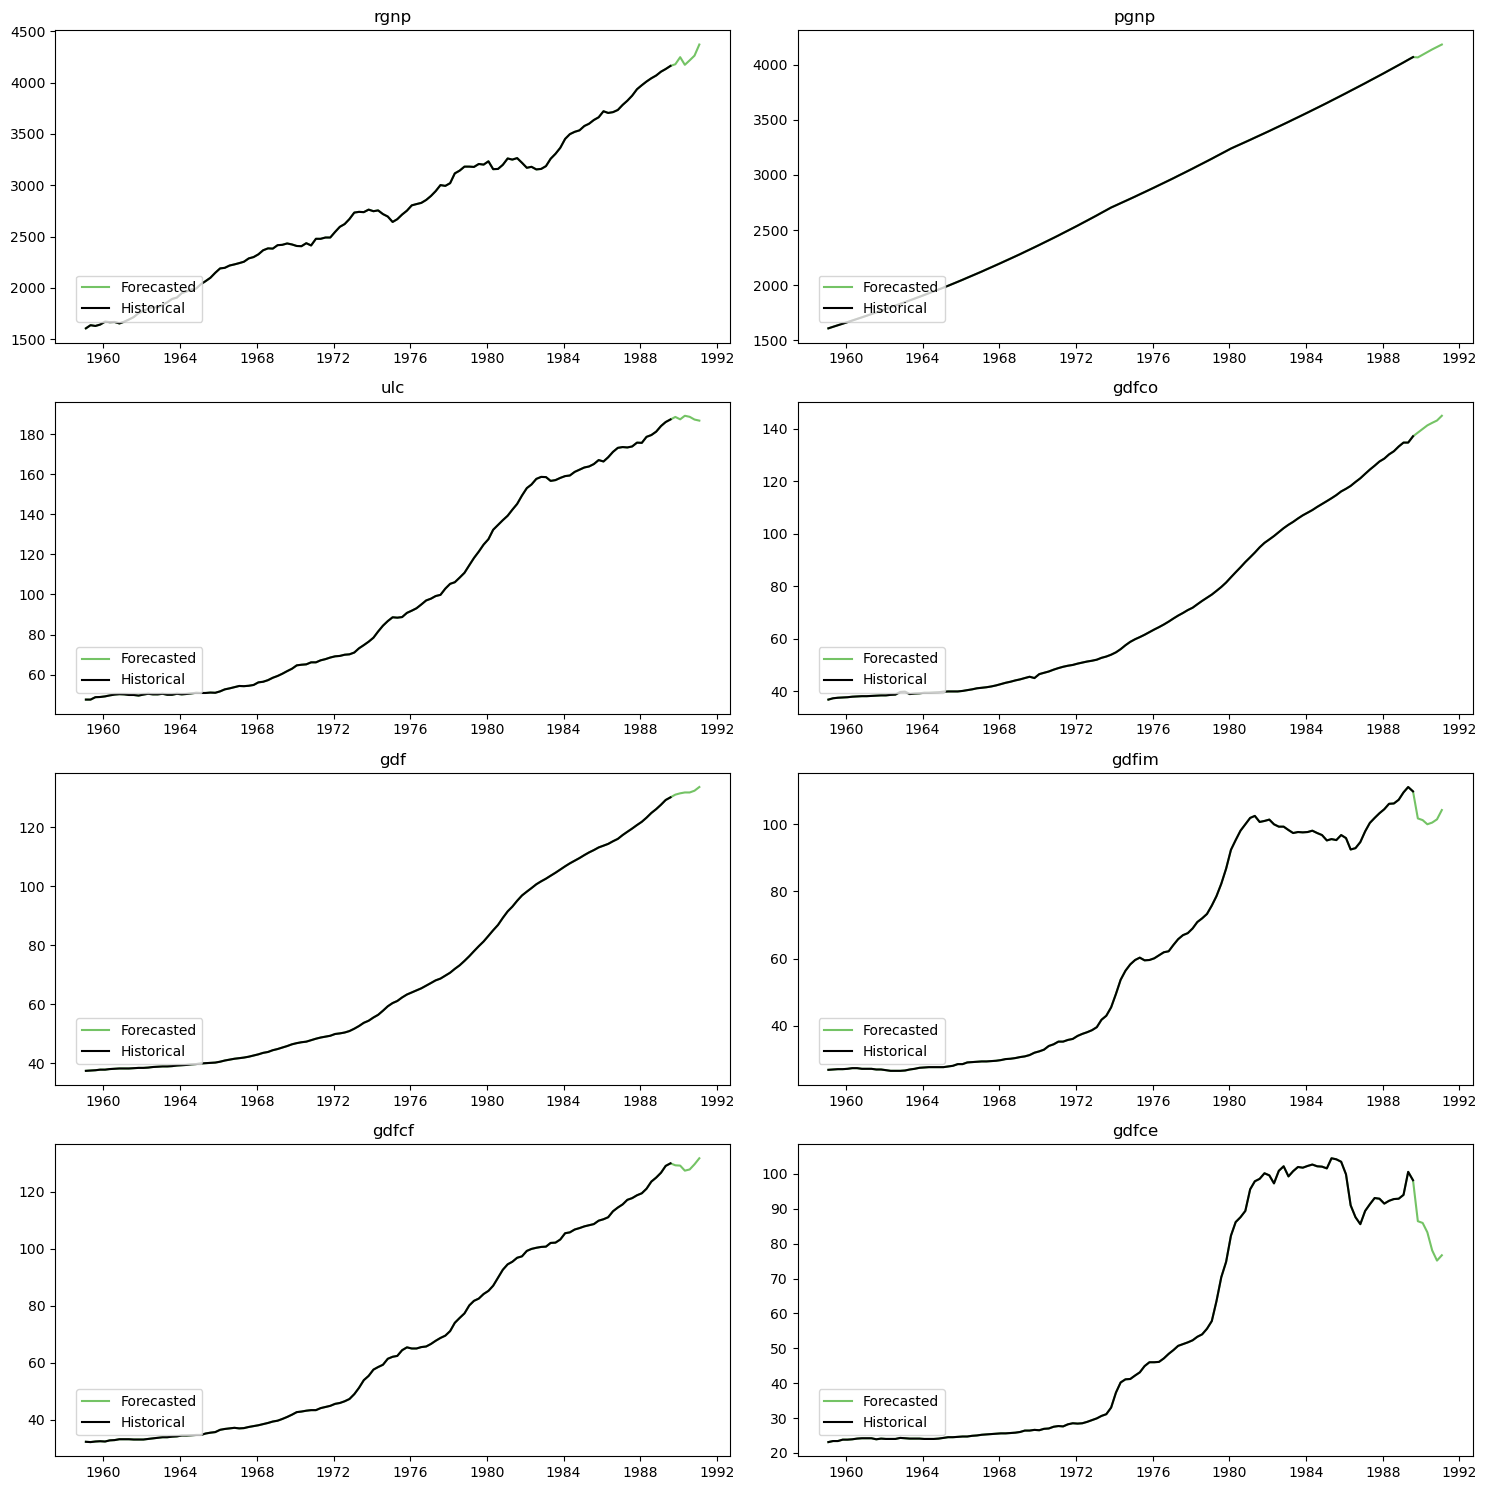

In [18]:
plot_all_features(df, forecast_df, has_predictions=True)

- The historical data is represented by the black lines, while the green lines signify forecasts beginning in October 1989.
- The majority of forecasts indicate a rising trend, although a few exhibit a decline.

Given the long-term nature of the forecasts, a closer examination of the graphs is necessary for better interpretation.

**Examine the final portion of the data line closely.**

Limit the analysis to the last five years or 20 quaters of data.

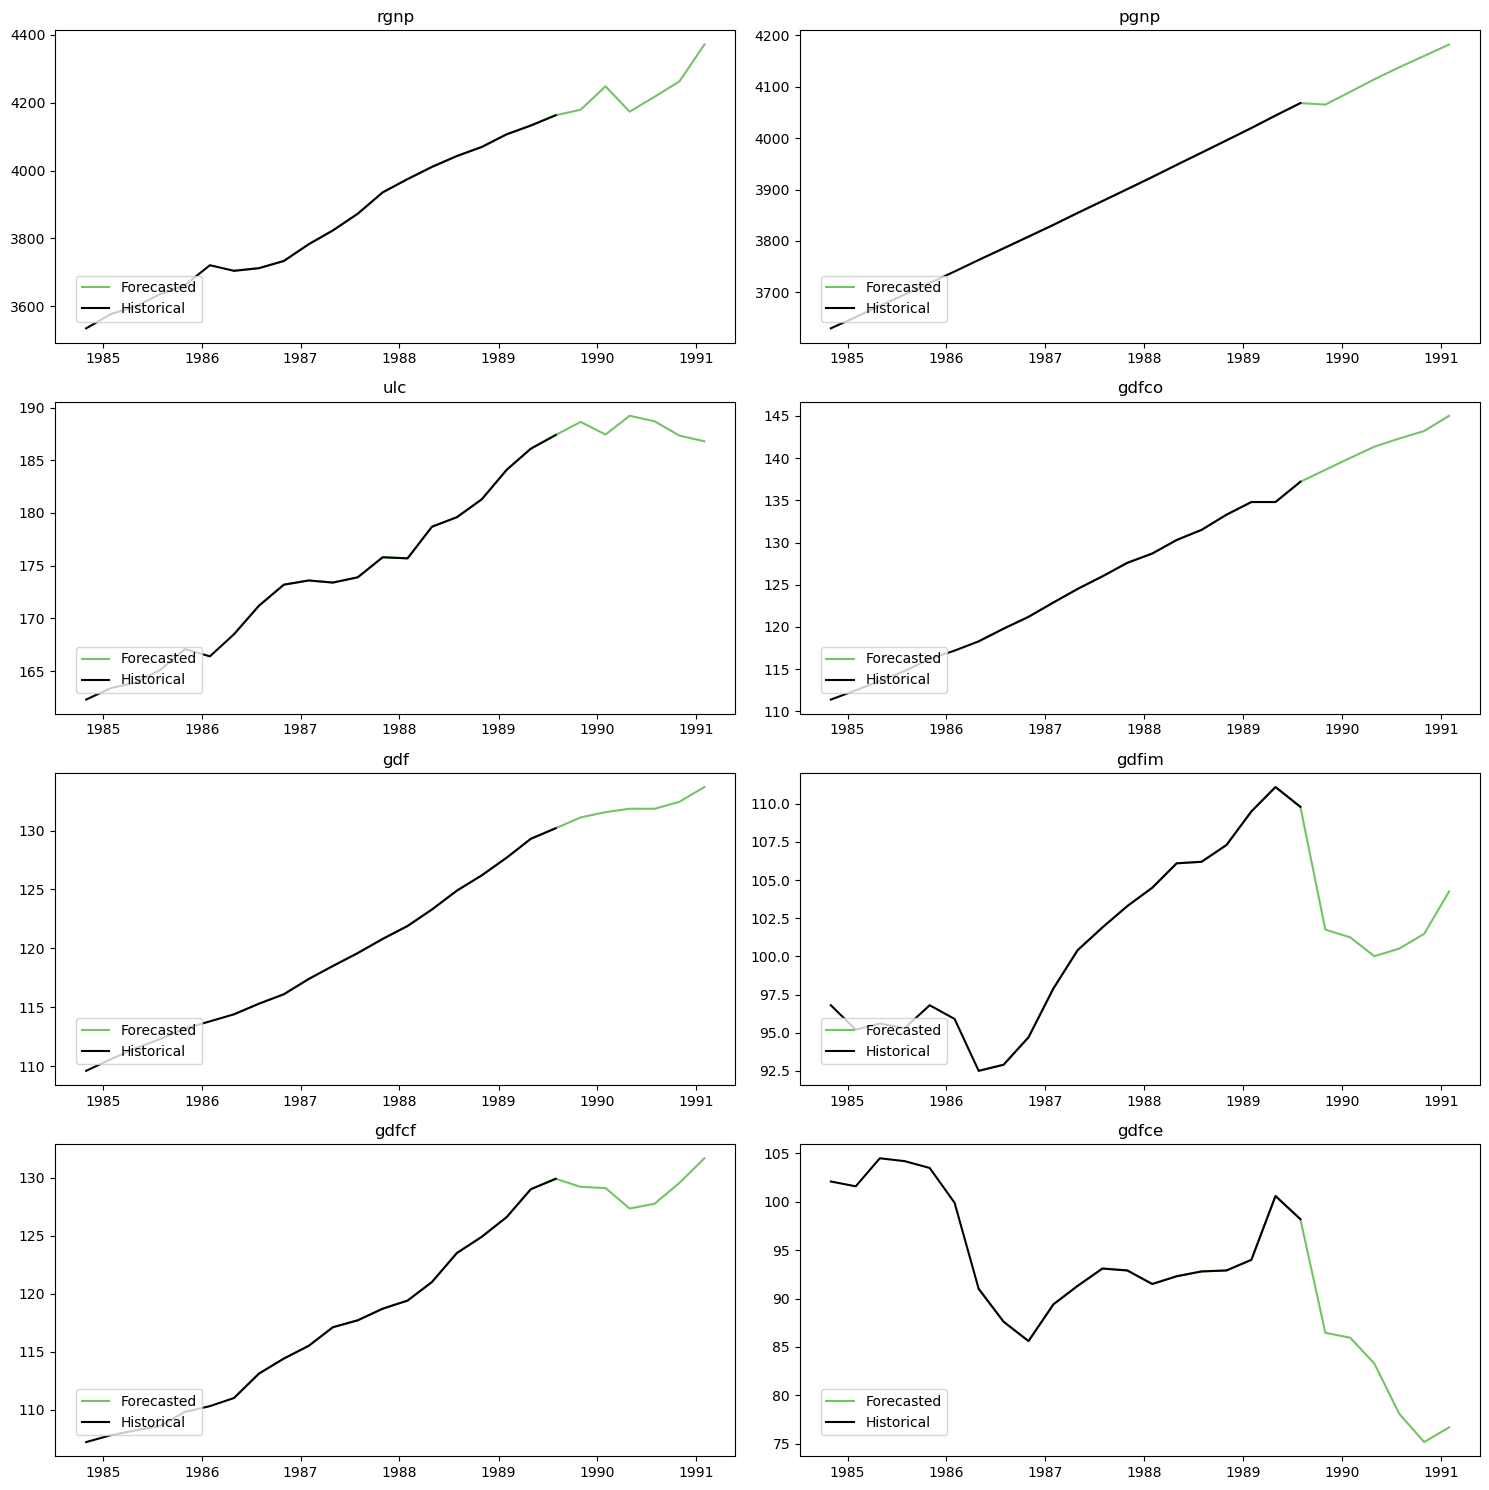

In [19]:
plot_all_features(df[-20:], forecast_df[-20:], has_predictions=True)

**Spotlights** 

- The zoomed-in graphs provide a clearer view of the projected trends.
- RGNP is expected to experience fluctuations in the early 1990s before entering a growth phase.
- PGNP is anticipated to show overall growth, with a minor setback in the late 1980s.